In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Set path
path = r'C:\Users\karya\Instacart Basket Analysis'

In [3]:
path

'C:\\Users\\karya\\Instacart Basket Analysis'

In [4]:
# Importing orders_products_customer_merged
orders_products_customer_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customer_merged.pkl'))

In [5]:
orders_products_customer_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,order_frequency_flag,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,both,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196.0,1.0,1.0,both,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196.0,1.0,1.0,both,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196.0,1.0,1.0,both,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196.0,1.0,1.0,both,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [6]:
orders_products_customer_merged.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_time_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merged2', 'price_range_loc', 'Busiest day',
       'Busiest days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_price', 'spending_flag', 'median_prior_orders',
       'order_frequency_flag', 'first_name', 'surname', 'gender', 'state',
       'age', 'date_joined', 'n_dependants', 'fam_status', 'income'],
      dtype='object')

#### Q2. If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart

#### Already done

#### Q3. You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
In a markdown cell beneath your histogram, describe what the histogram demonstrates.

Text(0, 0.5, 'Frequency')

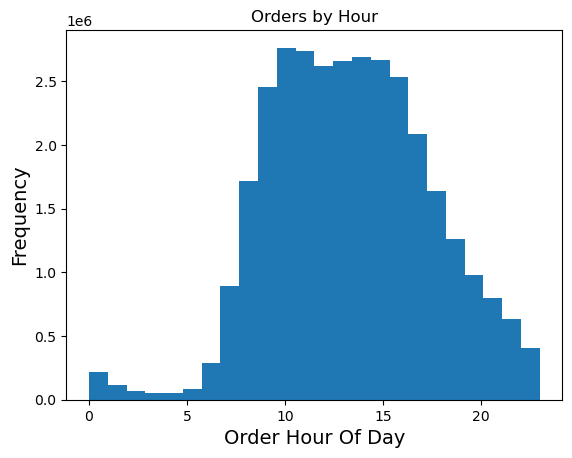

In [8]:
# creating a  Histogram
hist = orders_products_customer_merged['order_time_of_day'].plot.hist(bins = 24) #24hours 
plt.title("Orders by Hour")
plt.xlabel("Order Hour Of Day", fontsize=14)
plt.ylabel("Frequency",fontsize=14)

### The Insights
The Histogram indicates that the busiest Order Hours of the day are 10 AM to 4 PM. The number of orders reach their peak at 10 AM and then graudally reduce. The lowest number of orders have taken place at 4 AM.

In [8]:
# Exporting the visualization
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram_order_hour_of_day.png'))

#### Q4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

In [ ]:
orders_products_customer_merged.loc[[orders_products_customer_merged['loyalty_flag']]]

Text(0.5, 1.0, 'Number of Orders by Loyalty')

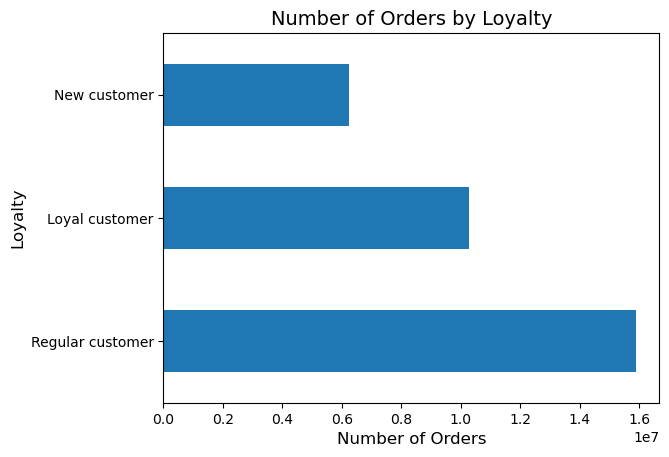

In [10]:
#create a bar chart
bar= orders_products_customer_merged['loyalty_flag'].value_counts()
bar= bar.plot(kind='barh') 
plt.xlabel("Number of Orders", fontsize=12)
plt.ylabel("Loyalty", fontsize=12)  

plt.title("Number of Orders by Loyalty", fontsize=14)

### The Insights
The Regular customer make up the bigest portion and the New customer make up the smallest portion of the intscart users.

In [11]:
# Exporting the visualization
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barchart_loyalty_number_orders.png'))

#### Q5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. 
(Hint: To check this, you need to use an accurate sample for your line chart!)

In [12]:
# Make a sample data
np.random.seed(4)

In [15]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [16]:
# Create a list holding True/False values to the test dev = np.random.rand() <= 0.7
dev = np.random.rand(len(orders_products_customer_merged)) <= 0.7

In [17]:
# Store 70% of the sample in the dataframe 'big' by running the following code:
big = orders_products_customer_merged[dev]

In [18]:
# Store 30% of the sample in the dataframe 'small' by running the following code:
small = orders_products_customer_merged[~dev]

In [19]:
# lets check whether the sum of the rows of both sample is equal to the total number of the rows in the main dataframe
len(big)+len(small)

32404859

In [20]:
len(orders_products_customer_merged)

32404859

### Exactly the same!!

In [21]:
# Now Create a subset only containing columns 'prices' and 'order time of day'
df = small[['prices', 'order_time_of_day']]

C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

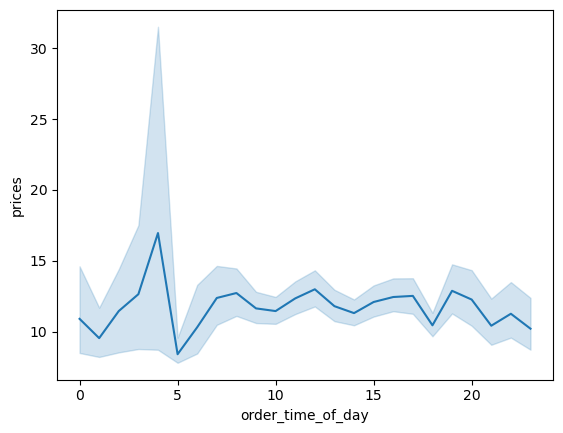

In [22]:
# Creating the line Chart
line_price_oreder_time = sns.lineplot(data = df, x = 'order_time_of_day',y = 'prices')

### The Insights
The line chart indicate that there is no significant correlation between the prices and the order time of the day.

In [23]:
# Exporting the visualization
line_price_oreder_time.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_price_oreder_time.png'))

#### Q6. Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
In a markdown cell beneath your line chart, describe what the line chart shows.

Text(0.5, 1.0, 'Number of Users by Marital Status')

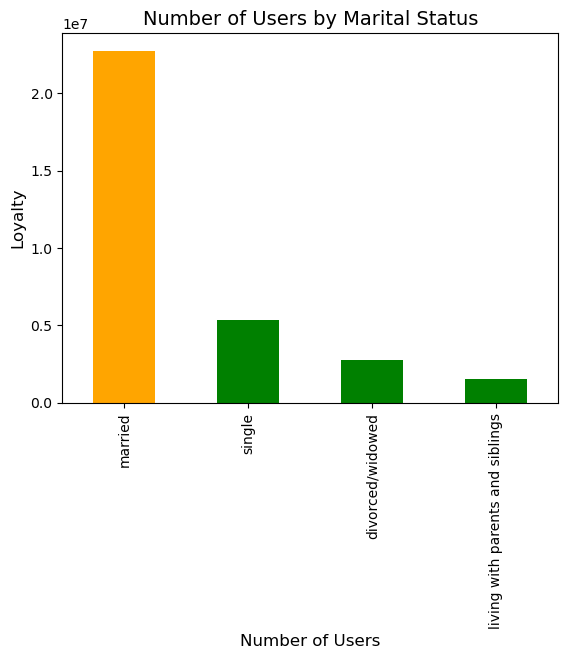

In [24]:
#create bar chart to find the distribution of marital status from 'fam_status'
marital_status = orders_products_customer_merged['fam_status'].value_counts().plot.bar(color = ['orange', 'green', 'green', 'green'])
plt.xlabel("Number of Users", fontsize=12)
plt.ylabel("Loyalty", fontsize=12)  
plt.title("Number of Users by Marital Status", fontsize=14)

In [25]:
# Exporting the visualization
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barchart_marital_status.png'))

### The Insights
The barchart indicates that the greatest portion of the instacart users are married.

In [26]:
# Now creating a subset of 'n_dependants' and 'age'
df_2 = small[['n_dependants', 'age']]

C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

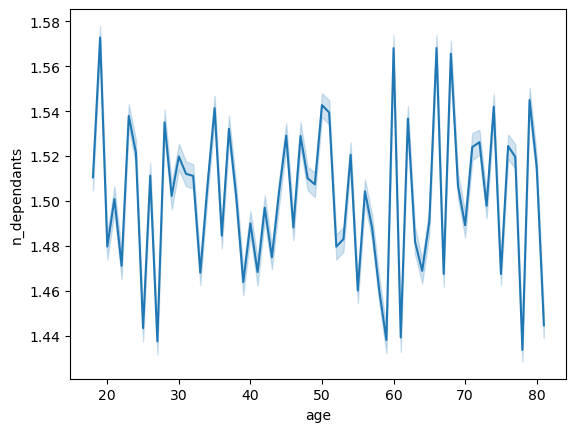

In [27]:
line_age_dependants = sns.lineplot(data = df_2, x = 'age',y = 'n_dependants')

### The Insights
The linechart indicates that there is no connection between th age and number of dependants

In [28]:
# Exporting the visualization
line_age_dependants.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependants.png'))

#### Q7. You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
In a markdown cell beneath your scatterplot, describe what the scatterplot shows

In [14]:
orders_products_customer_merged (['age_group', 'income']).plot.bar() 

TypeError: 'DataFrame' object is not callable

C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\karya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


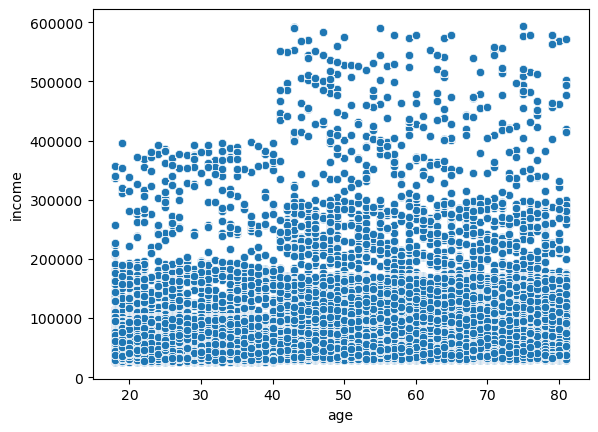

In [29]:
# Creating scatterplots
age_income_scatterplot = sns.scatterplot(x = 'age', y = 'income',data = orders_products_customer_merged)

### The Insights
The scatterplot indicates that the users aging above (40 years) , have income of higher than 400000.

In [30]:
# Exporting the visualization
age_income_scatterplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_income_scatterplot.png'))

In [31]:
orders_products_customer_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 34 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int32   
 1   user_id                 int32   
 2   order_number            int8    
 3   orders_day_of_week      int8    
 4   order_time_of_day       int8    
 5   days_since_prior_order  float16 
 6   product_id              float64 
 7   add_to_cart_order       float64 
 8   reordered               float64 
 9   _merge                  category
 10  product_name            object  
 11  aisle_id                int64   
 12  department_id           int64   
 13  prices                  float64 
 14  _merged2                category
 15  price_range_loc         object  
 16  Busiest day             object  
 17  Busiest days            object  
 18  busiest_period_of_day   object  
 19  max_order               int8    
 20  loyalty_flag            object  
 21  averag